# **PCA on Wine Dataset**

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [2]:
dataset = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\CourseProjects\ML\wine.csv')

X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values


**Splitting the dataset into the Training set and Test set**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
X.shape

(178, 13)

**Scaling the data**

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train.shape

(142, 13)

**Applying PCA**

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [8]:
X_train.shape

(142, 2)

In [9]:
explained_variance

array([0.36884109, 0.19318394])

In [10]:
X_train.shape

(142, 2)

**Fitting Logistic Regression To the training set**

In [11]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Predicting the test set result**

In [12]:
y_pred = classifier.predict(X_test)

**Confusion Matrix**

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

**Predicting the training set result**

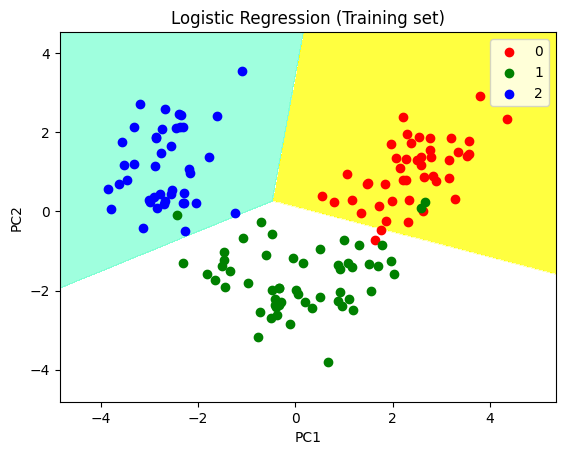

In [15]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                               np.arange(start = X_set[:, 1].min() - 1,
                                         stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

**Visualizing the Test set results**

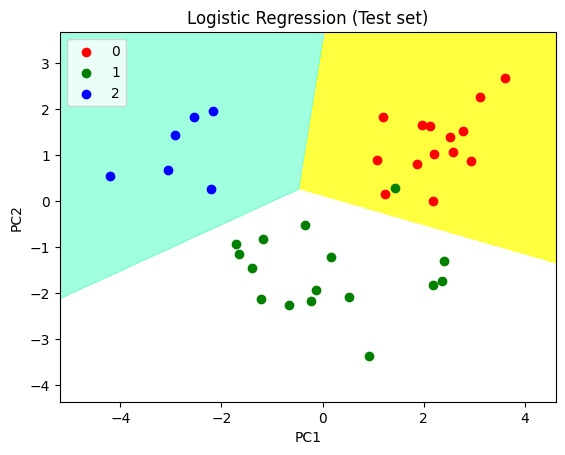

In [16]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()